# House Sales Analysis in King County, USA

## Question 1: Display the Data Types of Each Column

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("kc_house_data.csv")  # Ensure the correct file path
print(df.head()) 




           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

## Question 1: Display the data types of each column using the attribute dtypes, then take a screenshot and submit it. Include your code in the image.

In [13]:
# Display data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Question 2: Drop 'id' and 'Unnamed: 0' Columns & Show Statistical Summary

In [2]:

df.drop(["id", "Unnamed: 0"], axis=1, inplace=True, errors="ignore")
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Question 3: Count Unique Floor Values and Convert to DataFrame

In [3]:

df["floors"].value_counts().to_frame()


,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## Question 4: Boxplot for Waterfront View and Price Outliers

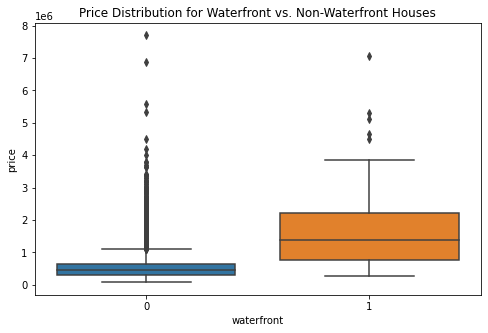

In [4]:

plt.figure(figsize=(8, 5))
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("Price Distribution for Waterfront vs. Non-Waterfront Houses")
plt.show()


## Question 5: Regression Plot for sqft_above vs. price

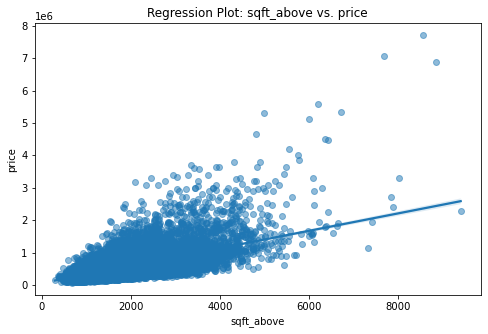

In [5]:

plt.figure(figsize=(8, 5))
sns.regplot(x="sqft_above", y="price", data=df, scatter_kws={"alpha": 0.5})
plt.title("Regression Plot: sqft_above vs. price")
plt.show()


## Question 6: Fit a Linear Regression Model (sqft_living → price) and Calculate R²

In [6]:

X = df[["sqft_living"]]
y = df["price"]
model = LinearRegression()
model.fit(X, y)
model.score(X, y)


0.4928532179037931

## Question 7: Fit a Linear Regression Model Using Multiple Features

In [7]:

features = ["sqft_living", "bedrooms", "bathrooms", "floors", "waterfront"]
X_multi = df[features]
model_multi = LinearRegression()
model_multi.fit(X_multi, y)
model_multi.score(X_multi, y)


0.5413827534726561

## Question 8: Create a Pipeline for Polynomial Regression and Compute R²

In [8]:

polynomial_pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("polynomial", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])
polynomial_pipeline.fit(X_multi, y)
polynomial_pipeline.score(X_multi, y)


0.5875507004778491

## Question 9: Ridge Regression with Regularization (α = 0.1)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_model.score(X_test, y_test)


0.552871742212453

## Question 10: Perform Polynomial Transformation + Ridge Regression

In [10]:

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(X_train_poly, y_train)
ridge_poly_model.score(X_test_poly, y_test)


D:\ANACONDA3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14522e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.5417578837869458